<a href="https://colab.research.google.com/github/MatiasRoman96/Alura-Oracle-sprint-1/blob/main/Landmarks%20faciales/Landmarks_Faciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¿Qué son los Landmarks Faciales?

Imaginen que queremos "marcar" los puntos más importantes de un rostro. ¿Cuáles serían? Las esquinas de los ojos, la punta de la nariz, las comisuras de los labios, la forma de la mandíbula, etc.

Los Landmarks Faciales son precisamente eso: un conjunto de puntos específicos predefinidos que representan características clave de un rostro humano en una imagen. Piensen en ellos como un "mapa" detallado de la cara.

<img src="https://ai.google.dev/static/mediapipe/images/solutions/face_landmarker_keypoints.png?hl=es-419" alt="Puntos clave de detección facial" width="40%">

## ¿Para qué sirven?

Tener este "mapa" de puntos en un rostro es increíblemente útil en Visión por Computadora para muchísimas aplicaciones:

** Alineación de rostros: Normalizar la posición y orientación de las caras para que estén siempre mirando al frente y centradas, facilitando otras tareas como el reconocimiento facial.

** Análisis de expresiones: Detectar si alguien está sonriendo, sorprendido, enojado, basándose en la posición relativa de los puntos (especialmente alrededor de la boca y los ojos).

** Filtros y efectos (¡como los de Instagram o Snapchat!): Superponer objetos virtuales (anteojos, sombreros, máscaras) de forma precisa sobre el rostro.

** Realidad Aumentada: Anclar elementos virtuales al rostro en tiempo real.

** Animación: Mover personajes digitales basándose en los movimientos de un actor real.

** Medición de distancias: Calcular distancias entre puntos para análisis forenses o médicos.

En resumen, los landmarks faciales nos dan una forma estructurada de entender la geometría y la pose de un rostro en una imagen.

**¡Manos a la obra!** Encontrando Landmarks
Vamos a usar una biblioteca de Google llamada MediaPipe. MediaPipe es genial porque nos da "soluciones" listas para usar para tareas comunes de visión por computadora y aprendizaje automático, ¡como detectar landmarks faciales!

También usaremos OpenCV (cv2), que es la biblioteca estándar para manejar imágenes en Python.

In [ ]:
# Instalamos mediapipe (generalmente ya está instalado en Colab)
# La exclamación al principio indica que es un comando de terminal
!pip install --upgrade numpy
!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 811.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.8 MB/s eta 0:00:00
  Attempting 

In [ ]:
# Importamos las bibliotecas que vamos a usar
import cv2 # Para manejar imágenes (leer, mostrar, dibujar)
import mediapipe as mp # La biblioteca que hace la magia de encontrar los puntos
# Esta es una función especial para mostrar imágenes en Google Colab
from google.colab.patches import cv2_imshow

print("Bibliotecas importadas correctamente.")

Bibliotecas importadas correctamente.


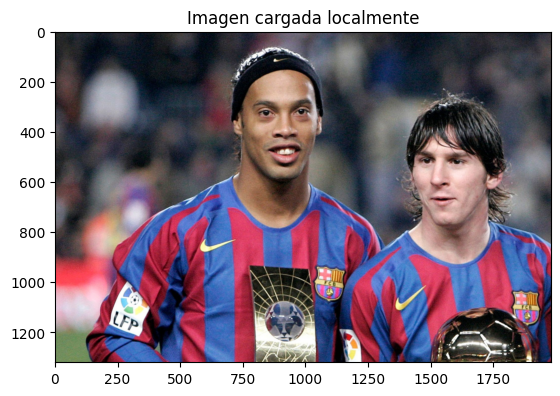

Imagen cargada exitosamente desde /content/image_path.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen local
image_path = "/content/image_path.jpg"

# Cargar la imagen localmente desde la ruta indicada
img_rgb = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if img_rgb is None:
    print(f"Error al cargar la imagen desde {image_path}. Asegúrate de que el archivo exista.")
else:
    # Convertir la imagen de BGR (por defecto en OpenCV) a RGB para mostrar correctamente en Matplotlib
    img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen cargada
    plt.imshow(img_rgb)
    plt.title("Imagen cargada localmente")
    plt.show()

    print(f"Imagen cargada exitosamente desde {image_path}")


In [ ]:
# Ahora vamos a cargar la imagen que descargamos (o subiste)
# OpenCV la lee y la guarda en una variable 'imagen'
imagen = cv2.imread(image_path)

# Verificamos si la imagen se cargó correctamente
if imagen is None:
    print(f"¡Error! No se pudo cargar la imagen desde {image_path}.")
    print("Asegúrate de que el archivo exista en el entorno de Colab y el nombre sea correcto.")
else:
    print("Imagen cargada correctamente.")
    # Mostramos las dimensiones de la imagen (ancho x alto)
    print(f"Dimensiones de la imagen: {imagen.shape[1]} píxeles de ancho x {imagen.shape[0]} píxeles de alto.")

    # MediaPipe funciona mejor con imágenes en formato RGB (Rojo, Verde, Azul)
    # Pero OpenCV las carga en BGR (Azul, Verde, Rojo).
    # Hacemos la conversión necesaria.
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    print("Imagen convertida a formato RGB para MediaPipe.")

Imagen cargada correctamente.
Dimensiones de la imagen: 1980 píxeles de ancho x 1320 píxeles de alto.
Imagen convertida a formato RGB para MediaPipe.


In [ ]:
# Aquí le decimos a MediaPipe que use su "solución" para encontrar puntos faciales.
# mp.solutions.face_mesh contiene el modelo pre-entrenado.
# FaceMesh es la clase que usamos para crear el detector.
# static_image_mode=True: Le decimos que procese una imagen estática (no un video).
# max_num_faces=1: Le decimos que solo busque un rostro para simplificar.
# refine_landmarks=True: Intenta hacer los puntos un poco más precisos.
# min_detection_confidence=0.5: Solo considera un rostro si está seguro al menos en un 50%.
mp_face_mesh = mp.solutions.face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5)

print("Detector de puntos faciales inicializado.")

# Ahora procesamos la imagen. MediaPipe busca rostros y, si encuentra, sus puntos.
print("Procesando la imagen para encontrar puntos...")
resultados = mp_face_mesh.process(imagen_rgb)

# Una vez que terminamos de usar el detector, lo liberamos
mp_face_mesh.close()

print("Procesamiento completado.")

Detector de puntos faciales inicializado.
Procesando la imagen para encontrar puntos...
Procesamiento completado.


¡Rostro(s) detectado(s)! Se encontraron puntos faciales.
Cantidad de puntos detectados en el rostro: 478
Puntos dibujados sobre la imagen.

--- Imagen con Puntos Faciales ---


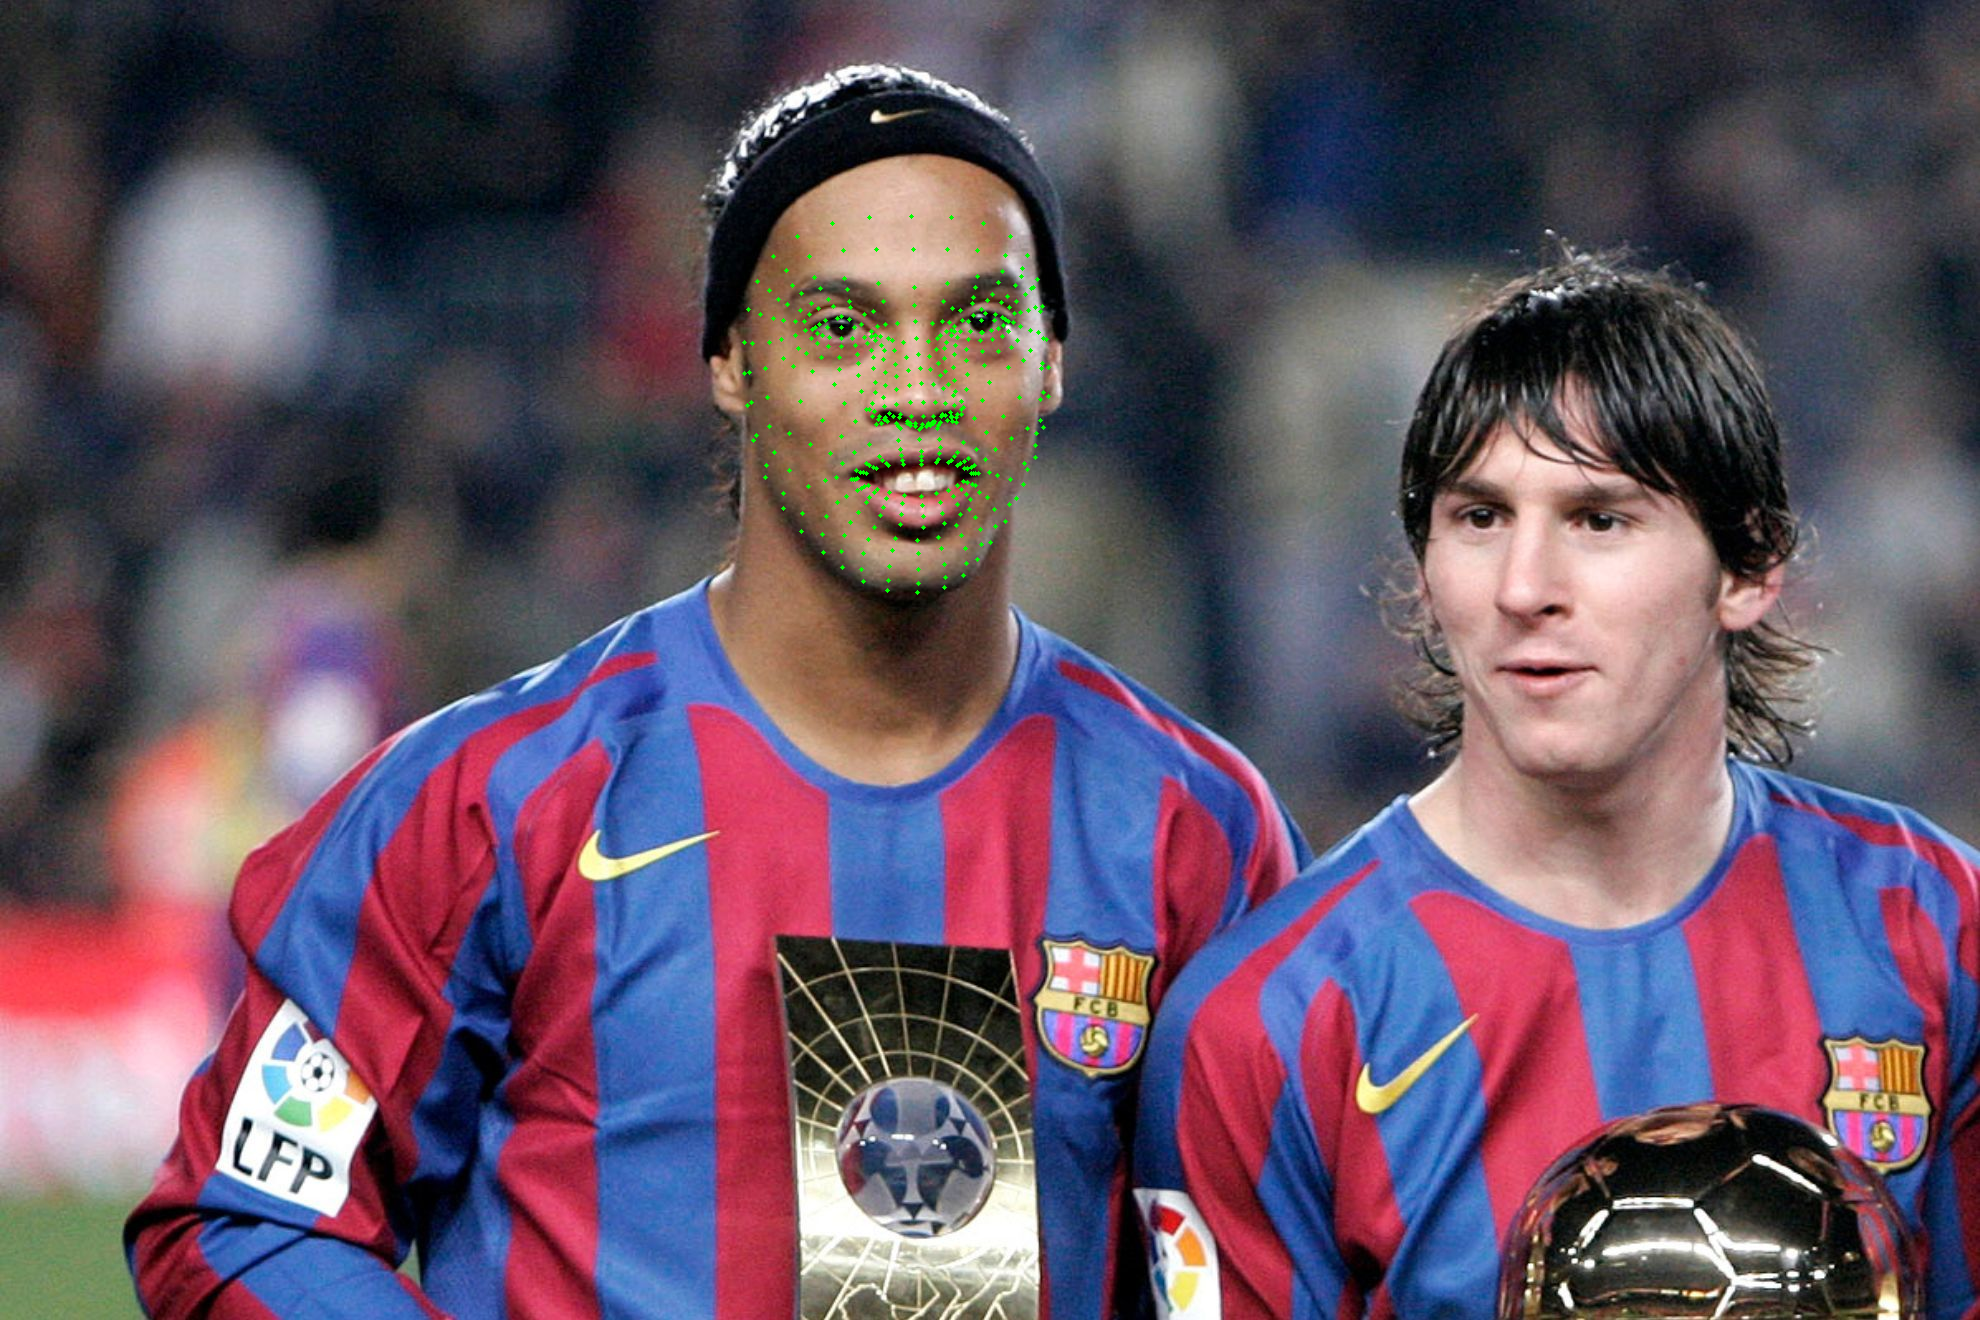

In [ ]:
# Creamos una copia de la imagen original para dibujar sobre ella
# Así no modificamos la imagen original
imagen_con_puntos = imagen.copy()

# Obtenemos las dimensiones de la imagen (alto y ancho)
alto, ancho, _ = imagen.shape

# Verificamos si MediaPipe encontró algún rostro y sus puntos
# 'resultados.multi_face_landmarks' es una lista de los rostros encontrados
if resultados.multi_face_landmarks:
    print(f"¡Rostro(s) detectado(s)! Se encontraron puntos faciales.")

    # Tomamos el primer rostro detectado (porque pusimos max_num_faces=1)
    rostro = resultados.multi_face_landmarks[0]

    # Mostramos cuántos puntos se encontraron en este rostro
    print(f"Cantidad de puntos detectados en el rostro: {len(rostro.landmark)}")

    # Ahora, recorremos cada punto (landmark) detectado en este rostro
    # 'rostro.landmark' es la lista de todos los puntos
    for id_punto, punto in enumerate(rostro.landmark):
        # 'punto' tiene las coordenadas x, y, z (la z es la profundidad, no la usaremos ahora)
        # Las coordenadas x e y están normalizadas (entre 0 y 1)

        # Convertimos las coordenadas normalizadas a coordenadas de píxeles reales
        # Multiplicamos por el ancho o alto de la imagen
        coord_x_pixel = int(punto.x * ancho)
        coord_y_pixel = int(punto.y * alto)

        # Dibujamos un pequeño círculo en la posición del punto sobre la imagen_con_puntos
        # cv2.circle(imagen, centro, radio, color, grosor)
        # centro: es una tupla (x, y)
        # radio: el tamaño del círculo (1 o 2 píxeles es suficiente)
        # color: una tupla (B, G, R) - usamos (0, 255, 0) que es Verde en OpenCV
        # grosor: -1 significa que rellene el círculo
        cv2.circle(imagen_con_puntos, (coord_x_pixel, coord_y_pixel), 2, (0, 255, 0), -1) # Dibujamos un punto verde de radio 2

    print("Puntos dibujados sobre la imagen.")

    # Finalmente, mostramos la imagen resultante con los puntos dibujados
    print("\n--- Imagen con Puntos Faciales ---")
    # Usamos cv2_imshow para mostrar la imagen en Colab
    cv2_imshow(imagen_con_puntos)

else:
    print("No se detectaron rostros en la imagen. Intenta con otra imagen o ajusta la confianza de detección.")



##Conclusión

Acabamos de usar herramientas poderosas para detectar y visualizar los puntos clave de un rostro humano. Vimos qué son los landmarks faciales, para qué sirven y cómo podemos encontrarlos con pocas líneas de código gracias a bibliotecas como MediaPipe y OpenCV.

Este es solo el comienzo. A partir de estos puntos, se pueden hacer análisis más complejos, como medir la distancia entre los ojos, determinar el ángulo de la cabeza, o incluso empezar a reconocer expresiones.

## Referencia

[Guía de detección de puntos de referencia faciales](https://ai.google.dev/edge/mediapipe/solutions/vision/face_landmarker?hl=es-419)